<a href="https://colab.research.google.com/github/jakubmis1998/NeuralNetworks/blob/main/PLARatchet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Winner PLARatchet made 103 steps(Max life time) with 87 classified samples.


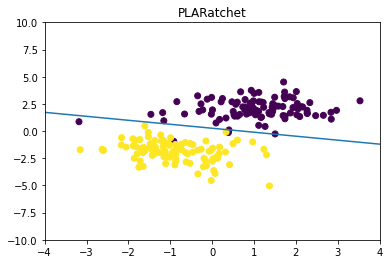

In [43]:
# PLARatchet (Pocket Learning Algorithm with Ratchet)

import numpy as np
from matplotlib import pyplot as plt
from IPython import display

def draw_plot(E, T, w, THETA):
  x1, x2 = -4.0, 4.0
  plt.cla()
  plt.title("PLARatchet")
  plt.xlim(x1, x2)
  plt.ylim(-10, 10)
  plt.scatter(E[:, 0], E[:, 1], c=T)
  plt.plot([x1, x2], [-w[0]/w[1] * x1 + THETA/w[1], -w[0]/w[1] * x2 + THETA/w[1]]);
  display.display(plt.gcf())
  display.clear_output(wait=True)

if __name__ == "__main__":
  # 100 samples 2D moved over [1, 2]
  A = np.random.randn(100, 2) + [1, 2]
  # First and second column
  Ax = A[:, 0]
  Ay = A[:, 1]
  # plt.scatter(Ax, Ay)

  # 100 samples 2D moved over [-1, -2]
  B = np.random.randn(100, 2) + [-1, -2]
  Bx = B[:, 0]
  By = B[:, 1]
  # plt.scatter(Bx, By)

  # Samples for perceptron learning
  E = np.zeros((200, 2))
  E[0:100] = A
  E[100:200] = B

  # True results for perceptron learning
  T = np.zeros((200,))
  T[0:100] = -1
  T[100:200] = 1

  # Perceptron learning variables
  iteration_count = 500
  learning_rate = 0.1
  k = 100
  N = 2
  THETA = np.random.default_rng().uniform(-1, 1, 1)[0]  # Random THETA [-1, 1)
  w = np.random.default_rng().uniform(-1, 1, 2)  # Random weights [-1, 1)
  processed = np.full(k * N, False)  # Processed samples
  global_life_time = 0
  global_classified_number = 0
  local_life_time = 0
  local_classified_number = 0
  best_weights = w

  # Perceptron learning
  for index in range(iteration_count):
    # Random index of samples
    j = np.random.randint(0, 200)

    # Output - result of the neural operation on E[j] - single sample
    O = 1 if np.dot(w, E[j]) - THETA >= 0 else -1

    # Calculate error
    ERR = T[j] - O

    # Unclassified sample
    if ERR != 0:
      local_life_time = 0  # Reset local life time
      local_classified_number = 0  # Reset number of classified samples
      processed = np.full(k * N, False)  # Reset processed samples
      # Weights and THETA calculate
      w += learning_rate * ERR * E[j]
      THETA -= learning_rate * ERR
      draw_plot(E, T, w, THETA)  # Update plot
    else:
      # Classified sample
      # Increase life time and store winner
      local_life_time += 1
      # Increase number of classified samples if not processed
      if not processed[j]:
        processed[j] = True  # Set as processed
        local_classified_number += 1
      # Store current winner
      if global_life_time < local_life_time and global_classified_number < local_classified_number:
        global_life_time = local_life_time
        global_classified_number = local_classified_number
        best_weights = w
  
  # Draw plot
  draw_plot(E, T, best_weights, THETA)
  print("Winner PLARatchet made {} steps(Max life time) with {} classified samples.".format(global_life_time, global_classified_number))
